Importing gempy



In [1]:
# Aux imports
import gempy as gp
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import gstools as gs
import pyvista as pv
import pyvistaqt as pvqt
import PVGeo
import glob
import random
from tqdm import tqdm
from numpy import cross, eye, dot
from scipy.linalg import expm, norm
from sklearn import preprocessing
from pyvista import set_plot_theme
np.random.seed(1515)
pd.set_option('precision', 2)
%matplotlib inline
set_plot_theme('document')

No module named 'osgeo'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\pasha\python\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We import a model from an existing folder, representing a subduction
zone with onlap relationships. The theano function is automatically
recombined to allow changes.




In [22]:
#define resolution and mesh size
reso=[120, 120, 120]
mesh_size = reso[0]*reso[1]*reso[2]
extent=[0, 2021, 0, 1000, -617, 100]
print(' mesh size: ' + str(mesh_size))

 mesh size: 1728000


In [23]:
geo_data = gp.create_data('foresets', extent=extent, resolution=reso,
                          path_o="2_orientation_data_all.csv",
                          path_i="1_point_data_all.csv")

Active grids: ['regular']


In [24]:
gp.map_stack_to_surfaces(geo_data, {"Strat_Series1":('topo'),
                                    "Strat_Series2":('overburden'),
                                    "Strat_Series3":('rhyolite','zinnwaiditegranite','lowmicagranite'),
                                    "Basement":('basement')})

,surface,series,order_surfaces,color,id
0,topo,Strat_Series1,1,#015482,1
1,overburden,Strat_Series2,1,#9f0052,2
2,rhyolite,Strat_Series3,1,#ffbe00,3
3,zinnwaiditegranite,Strat_Series3,2,#728f02,4
4,lowmicagranite,Strat_Series3,3,#443988,5
5,basement,Basement,1,#ff3f20,6


In [25]:
#geo_data.series.df['BottomRelation'][1]='Onlap'
geo_data.series.df['BottomRelation'][2]='Onlap'
#geo_data.series.df['BottomRelation'][3]='Onlap'
#geo_data.series.df['BottomRelation'][4]='Onlap'
#geo_data.series.df['BottomRelation'][5]='Onlap'
#geo_data.series.df['BottomRelation'][7]='Onlap'
#geo_data.set_is_fault(['Fault_Series'])
geo_data.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series1,1,Erosion,True,False,False
Strat_Series2,2,Erosion,True,False,False
Strat_Series3,3,Onlap,True,False,False
Basement,4,Erosion,False,False,False


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


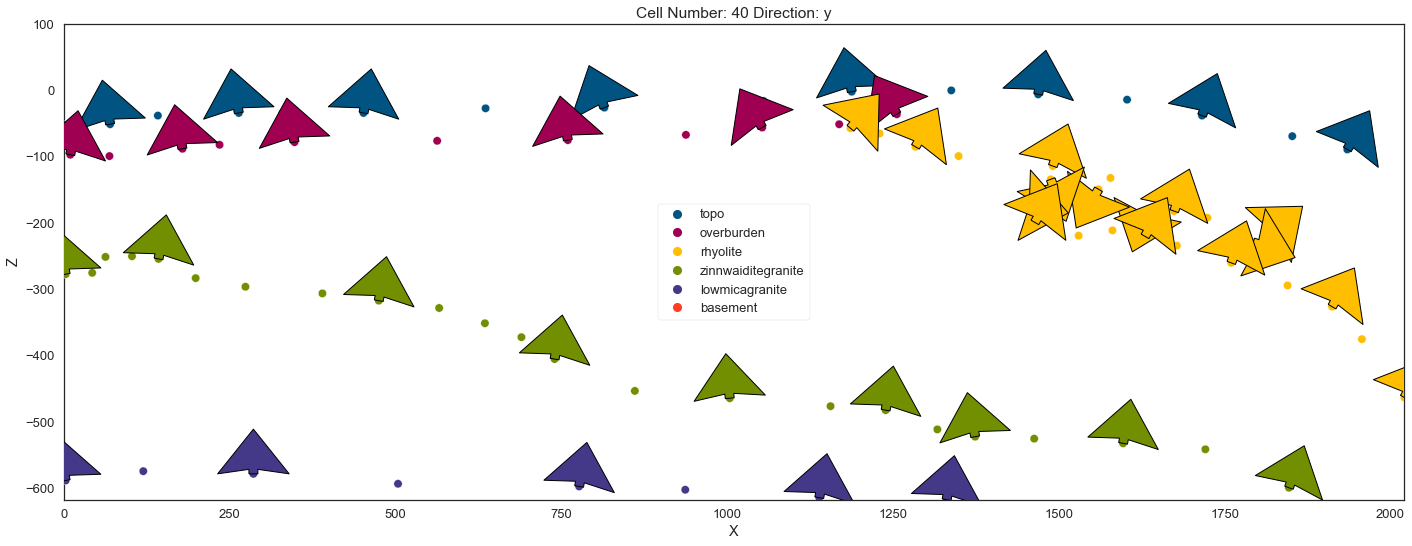

In [26]:
gp.plot_2d(geo_data, cell_number=40, show_data=True, figsize=(20,20))

In [27]:
geo_data.set_topography()

#geo_data.set_topography(source='random', fd=1.5, d_z=np.array([100, 0]), resolution=np.array([400, 400]))
#geo_model._grid.topography.save('test_topo')
#geo_model.set_topography(source='saved', filepath='test_topo.npy')

[-43.4 100. ]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   8.42083333,    4.16666667, -614.0125    ],
       [   8.42083333,    4.16666667, -608.0375    ],
       [   8.42083333,    4.16666667, -602.0625    ],
       ...,
       [2021.        ,  983.19327731,   -4.85807904],
       [2021.        ,  991.59663866,   -9.46756522],
       [2021.        , 1000.        ,   -9.71080116]])

In [28]:
interp_data = gp.set_interpolator(geo_data, compile_theano=True,theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 2366.12
$C_o$               133298.33
drift equations  [3, 3, 3, 3]


In [29]:
sol = gp.compute_model(geo_data, compute_mesh=True, debug=False)

C:\Users\pasha\python\lib\site-packages\gempy\core\solution.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


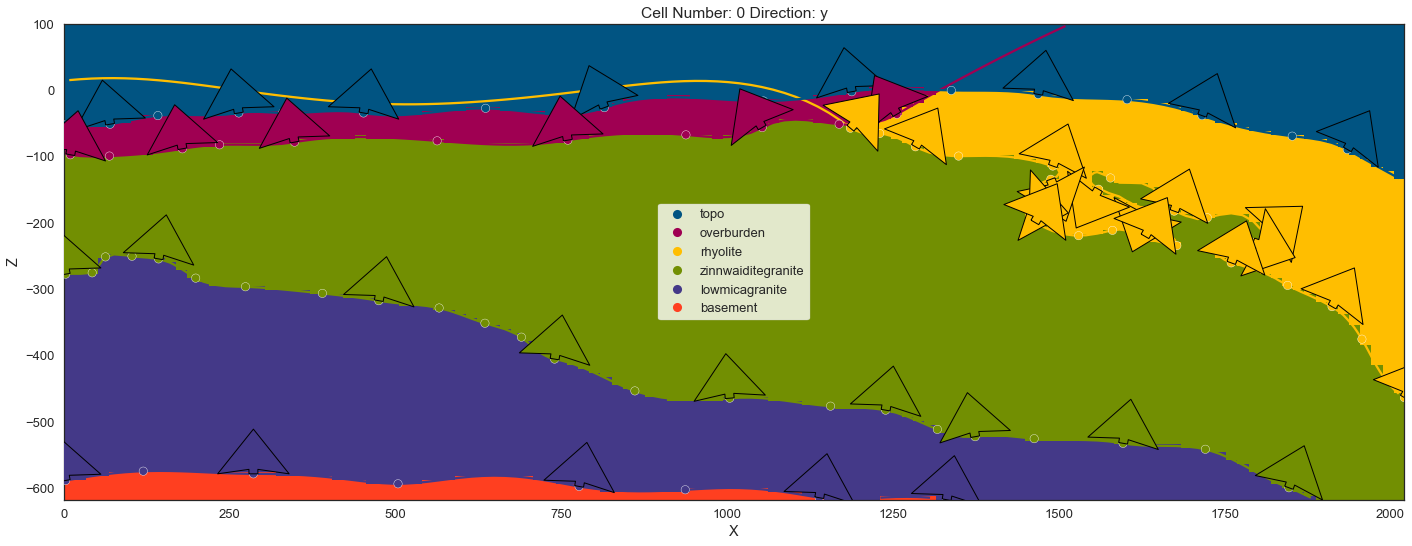

In [30]:
gp.plot_2d(geo_data, cell_number=0, show_data=True, figsize=(20,20))

In [46]:
p3d = gp.plot_3d(geo_data, plotter_type='background', show_lith=True, show_surfaces=True,  show_data=False, image=False,
                 show_topography=True,
                 kwargs_plot_structured_grid={'opacity': .8})

gp.save_model(geo_data)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


True

In [33]:
### User-defined functions
def extract_domain(sol, unit):
    '''
    Extract domain coordinates from gempy model by unit name
    arguments:
        sol: Gempy solution object.
        unit: gempy unit by index
    returns:
        dom_x, dom_y, dom_z: coordinates of domain
    '''

    # new version with rounding, definitely necessary
    rounded_lithblock = sol.lith_block.round(0)
    rounded_lithblock = rounded_lithblock.astype(int)

    # mask by array of input surfaces (by id, can be from different series)
    mask = np.isin(rounded_lithblock, unit)

    # get coordinates by mask
    #krig_lith = sol.lith_block[mask]
    dom_grid = sol.grid.values[:mesh_size][mask]

    dom_x = dom_grid[:,0]
    dom_y = dom_grid[:,1]
    dom_z = dom_grid[:,2]

    return dom_x, dom_y, dom_z

In [34]:
unit_count=int(np.max(sol.lith_block.round(0)))
series_count=len(sol.scalar_field_matrix)
unit_count, series_count

(6, 3)

### Geostatistics and Kriging

In [35]:
df =pd.read_csv('3_kriging_data_all.csv')
df

,X,Y,Z,grade_value,grade
0,5,0,-42,0.45,Sn1
1,40,0,-55,0.45,Sn1
2,76,0,-67,0.44,Sn1
3,127,0,-58,0.45,Sn1
4,155,0,-30,0.44,Sn1
...,...,...,...,...,...
312,1871,0,-442,0.41,0.4%Li_inside
313,1918,0,-430,0.41,0.4%Li_inside
314,2027,0,-507,0.41,0.4%Li_inside
315,1996,0,-579,0.41,0.4%Li_inside


In [36]:
# create some random input data data (conditioning data)
n=len(df.iloc[:,2])
x = df.iloc[:n,0]
y = df.iloc[:n,1]
z = df.iloc[:n,2]
cond_pos = np.array([x,y,z])
cond_val = df.iloc[:n,3]

In [37]:
# This is to extract smaller domains from gempy by 
#lithological units and their notations:
#topo - 1, overburden - 2, rhyolite - 3, zinnwaiditegranite - 4, lowmicagranite - 5, basement - 6
domain_x, domain_y, domain_z = extract_domain(sol, (4))

In [38]:
# grid coordinate preparation
coordinates = np.array([domain_x, domain_y, domain_z])
coordinates = coordinates.swapaxes(0,1)
    
# This is where the magic happens - GStools offers a lot of options, here a simple version with isotropic range
model = gs.Exponential(dim=3, var=np.var(cond_val), len_scale=200)
krige = gs.krige.Ordinary(model, cond_pos, cond_val)
#cond_srf = gs.CondSRF(krige)

# perform kriging
krige((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')
# alternatively fior SGS
#cond_srf((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')

# just convenience rename
field = krige
# alternatively for SGS
# field = cond_srf

In [39]:
# convert to pyvista mesh
pc = field.to_pyvista()

In [40]:
# 3D plotting example
spacing = lambda arr: np.unique(np.diff(np.unique(arr)))
voxelsize = spacing(pc.points[:,0]), spacing(pc.points[:,1]), spacing(pc.points[:,2])

pc = pc.cast_to_unstructured_grid()
#pc=geo_data.cast_to_unstructured_grid()

grade = PVGeo.filters.VoxelizePoints(dx=voxelsize[0][0], dy=voxelsize[1][0], dz=voxelsize[2][0], estimate=False).apply(pc)

In [41]:
#p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap=cmap)
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=False,
                kwargs_plot_structured_grid={'opacity': 1})

#creating the grade mesh calculated with kriging (colormap) 
gpv.p.add_mesh(grade, opacity=1, show_edges=False, lighting=False, cmap="terrain")

p.set_scale(zscale=1)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


In [33]:
#density of Li ore is 0.534g/cm3
#define grade intervals and check the count of voxels corresponding to the same interval
ore_interval1=[]

for index in tqdm(range(0, len(grade.active_scalars))):
    #for Horizon I:
    if grade.active_scalars[index]>0.44:
        ore_interval1.append(grade.active_scalars[index])
   
        
#calculate volume of total voxels corresponding to a certain ore grade interval
voxel_volume=((extent[1]-extent[0])/reso[0])*((extent[3]-extent[2])/reso[1])*((extent[5]-extent[4])/reso[2])

ore_avrg_grade=np.mean(ore_interval1)
volume=len(ore_interval1)*(voxel_volume)
print('Horizon1',volume)
print("Average ore grade=", ore_avrg_grade)

100%|████████████████████████████████| 214748/214748 [00:57<00:00, 3749.38it/s]

Horizon1 79383983.97070312
Average ore grade= 0.45651398963968304


### Extract kriged data

In [51]:
%%time
main_array=pc.points.tolist()
added_array=grid.active_scalars.tolist()
n=len(main_array)

for index in range(0,n,1):
    main_array[index].append(added_array[index])
grade=pd.DataFrame(main_array, columns=['X','Y','Z','grade'])
grade

Wall time: 63.9 ms


,X,Y,Z,grade
0,20.21,10.0,-265.67,0.42
1,20.21,10.0,-251.33,0.42
2,20.21,10.0,-236.99,0.42
3,20.21,10.0,-222.65,0.42
4,20.21,10.0,-208.31,0.42
...,...,...,...,...
52387,2000.79,990.0,-495.11,0.43
52388,2000.79,990.0,-480.77,0.43
52389,2000.79,990.0,-466.43,0.43
52390,2000.79,990.0,-452.09,0.43


In [52]:
#drill boreholess!!
def krige_boreholes(b_count):
    borehole_count=range(0,b_count,1)
    rand_ind=random.sample(range(0,len(grade)),b_count)
    dict_all={}
    boreholes_dict={}

    for index in tqdm(borehole_count):
        list_temp=[]
        for row in grade.itertuples():
            if (grade.iloc[rand_ind[index]].X==row.X and grade.iloc[rand_ind[index]].Y==row.Y):
                list_temp.append([row.X,row.Y,row.Z,row.grade])
                
        dict_all.update({index+1:list_temp})

    for index in range(0,b_count,1): 
        data_temp = pd.DataFrame(dict_all[index+1])
        data_temp.columns=['X','Y','Z','grade']
        data_temp.loc[:, 'borehole']=index+1
        boreholes_dict.update({index+1:data_temp})
    return boreholes_dict
        
boreholes=krige_boreholes(100)

100%|████████████████████████████████████████| 100/100 [07:01<00:00,  4.22s/it]


In [53]:
drill_all = pd.concat(boreholes.values(), ignore_index=True)
drill_all

,X,Y,Z,grade,borehole
0,1434.91,70.0,-509.45,0.43,1
1,1434.91,70.0,-495.11,0.43,1
2,1434.91,70.0,-480.77,0.43,1
3,1434.91,70.0,-466.43,0.43,1
4,1434.91,70.0,-452.09,0.43,1
...,...,...,...,...,...
2080,505.25,590.0,-150.95,0.44,100
2081,505.25,590.0,-136.61,0.44,100
2082,505.25,590.0,-122.27,0.44,100
2083,505.25,590.0,-107.93,0.44,100


In [55]:
list_tempo=[]
for index in range(0,len(drill_all),10):
    list_tempo.append(drill_all.iloc[index])
br=pd.DataFrame(list_tempo)

br.to_csv('3_kriging_100.csv')
br

,X,Y,Z,grade,borehole
0,1434.91,70.0,-509.45,0.43,1.0
10,1434.91,70.0,-366.05,0.44,1.0
20,1434.91,70.0,-222.65,0.44,1.0
30,788.19,130.0,-394.73,0.43,2.0
40,788.19,130.0,-251.33,0.45,2.0
...,...,...,...,...,...
2040,990.29,350.0,-136.61,0.44,98.0
2050,1515.75,870.0,-480.77,0.43,99.0
2060,1515.75,870.0,-337.37,0.43,99.0
2070,505.25,590.0,-294.35,0.44,100.0


In [56]:
vertices = drill_all[['X','Y','Z']].values
kriged=pv.PolyData(vertices)
kriged['grade'] = drill_all['grade'].values
kriged

PolyData (0x212039230a0)
  N Cells:	2085
  N Points:	2085
  X Bounds:	2.021e+01, 2.001e+03
  Y Bounds:	1.000e+01, 9.900e+02
  Z Bounds:	-6.098e+02, -5.057e+01
  N Arrays:	1

In [57]:
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=True,
                kwargs_plot_structured_grid={'opacity': .3})

#creating the grade mesh calculated with kriging (colormap) 
gpv.p.add_mesh(kriged, scalars='grade', opacity=1, cmap='viridis', point_size=5)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0000021256668160

### Extract orientation data from the solution

In [78]:
#define the function to calculate gradient (dict_spec)

def get_gradient(sol, res, dim):
    '''
    Calculate gradient from model solution
    '''
    # scalar field as meshgrid
    dict_all={}
    dict_spec={}
    for index in range(0,series_count,1):
        scalar_mgrid = sol.scalar_field_matrix[index].reshape(res)

        # calculate gradient
        gx, gy, gz = np.gradient(scalar_mgrid)

       
        vectors = np.array([gx.reshape(int(res[0] ** dim)), gy.reshape(int(res[0] ** dim)), gz.reshape(int(res[0] ** dim))])
        vectors = np.swapaxes(vectors, 0, 1)
        vectors = preprocessing.normalize(vectors, norm='l2')
        dict_all.update({index:vectors})
         
    
    for index in range(0,series_count,1):
            data_temp = pd.DataFrame(dict_all[index])
            dict_spec.update({'series_{}'.format(index):data_temp})
    return dict_spec

dict_spec=get_gradient(sol, res=[50,50,50], dim=3)

#define cell locations and correspoding domain name
x=sol.grid.regular_grid.values[:, 0]
y=sol.grid.regular_grid.values[:, 1]
z=sol.grid.regular_grid.values[:, 2]
formation=sol.lith_block

#add cell locations and domain names to the gradient dataframe
for key,value in dict_spec.items():
    #load coordinate and formation array to the whole series dataframes
    value["X"]=x
    value['Y']=y
    value['Z']=z
    value['formation']=formation
    #value = value.reset_index()
    #define column names
    value.columns=['G_x','G_y','G_z','X','Y','Z','formation'] 

In [81]:
#extract and save necessary orientation data for each strat series
dict_spec['series_0']=dict_spec['series_0'][dict_spec['series_0'].formation==1]

dict_spec['series_1']=dict_spec['series_1'][dict_spec['series_1'].formation==2]

dict_spec['series_2']=dict_spec['series_2'].drop(dict_spec['series_2'][(dict_spec['series_2'].formation<=2)].index)

#join all orientation data into one data frame
orientations = pd.concat([dict_spec['series_0'],dict_spec['series_1'],dict_spec['series_2']], ignore_index=True)

#extract ideal case grid and define it as "ideal"
unit=range(0,unit_count+1)
for index in unit:
    domain_x, domain_y, domain_z = extract_domain(sol, (unit[index+1]))
    coordinates = np.array([domain_x, domain_y, domain_z])
    coordinates = coordinates.swapaxes(0,1)
    data=pd.DataFrame(coordinates, columns=['X','Y','Z'])
    data.loc[:, 'formation'] =float(unit[index+1])
    data.to_csv(r'data_extracted/ideal/unit_{}.csv'.format(unit[index+1]), mode="w", index=False)

In [83]:
# if you want to join all files in the same folder
path =r'data_extracted/ideal/'

filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
ideal = pd.concat(dfs, ignore_index=True)

#compare ideal and orientation grid and extract the cells that are the same
df_same = orientations.merge(ideal, left_on=('X','Y','Z','formation'), right_on=('X','Y','Z','formation'), how='inner')
df_same= df_same[df_same.formation != unit_count]
df_same

IndexError: range object index out of range

In [103]:
#drill boreholess!!
def d_boreholes(b_count):
    borehole_count=range(0,b_count,1)
    rand_ind=random.sample(range(0,len(df_same)),b_count)
    dict_all={}
    boreholes_dict={}

    for index in tqdm(borehole_count):
        list_temp=[]
        for row in df_same.itertuples():
            if (df_same.iloc[rand_ind[index]].X==row.X and df_same.iloc[rand_ind[index]].Y==row.Y):
                list_temp.append([row.X,row.Y,row.Z,row.G_x, row.G_y, row.G_z, row.formation])
                
        dict_all.update({index+1:list_temp})

    for index in range(0,b_count,1): 
        data_temp = pd.DataFrame(dict_all[index+1])
        data_temp.columns=['X','Y','Z','G_x','G_y','G_z','formation']
        data_temp.loc[:, 'borehole']=index+1
        boreholes_dict.update({index+1:data_temp})
    return boreholes_dict

#define desired number of boreholes
boreholes_dict=d_boreholes(100)

#join all borehole data into one dataframe
df = pd.concat(boreholes_dict.values(), ignore_index=True)
# boreholes_dict.to_csv('test100')

#load joined csv dataset
bore_count = df['borehole'].nunique()

#create mesh grid and define vertices, convert it to a pyvista poly data
vertices = df[['X', 'Y', 'Z']].values
grid=pv.PolyData(vertices)
grid['formation'] = df['formation'].values

In [109]:
unit=('topo','overburden', 'rhyolite','zinnwaiditegranite','lowmicagranite')
for index in range(1,unit_count):
    df['formation'] = df.loc[:,'formation'].replace(index,unit[index-1])

df

,X,Y,Z,G_x,G_y,G_z,formation,borehole
0,1071.13,450.0,6.79,-0.06,0.09,0.99,topo,1
1,1071.13,450.0,21.13,-0.06,0.09,0.99,topo,1
2,1071.13,450.0,35.47,-0.06,0.09,0.99,topo,1
3,1071.13,450.0,49.81,-0.06,0.09,0.99,topo,1
4,1071.13,450.0,64.15,-0.05,0.09,0.99,topo,1
...,...,...,...,...,...,...,...,...
3753,707.35,350.0,-150.95,0.25,0.21,0.95,zinnwaiditegranite,99
3754,707.35,350.0,-136.61,0.22,0.22,0.95,zinnwaiditegranite,99
3755,707.35,350.0,-122.27,0.20,0.23,0.95,zinnwaiditegranite,99
3756,707.35,350.0,-107.93,0.17,0.23,0.96,zinnwaiditegranite,99


In [57]:
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=True,
                kwargs_plot_structured_grid={'opacity': .3})

#creating the grade mesh calculated with kriging (colormap) 
gpv.p.add_mesh(grid, scalars='formation', opacity=1, cmap='viridis', point_size=15)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)00000289EF4DA2E0

### Extract data from boreholes to generate point data for the regenerated model

In [110]:
#picking lowermost boundary for each formation through the borehole data 

dict_all=[]
list_temp=[]

for br in range(1,bore_count+1,1):
    for fr in range(1,form_count+1,1):
          list_temp.append(df[(df['borehole']==br) & (df['formation']==unit[fr-2])])
list_temp2=[]
for i in list_temp:
    if(not i.empty):
        list_temp2.append(i.iloc[0])
df_b=pd.DataFrame(list_temp2, index=range(0,len(list_temp2),1))
del df_b['borehole']
t = pd.CategoricalDtype(categories=['topo','overburden', 'rhyolite','zinnwaiditegranite','lowmicagranite'], ordered=True)
df_b['formation']=pd.Series(df_b.formation, dtype=t)
df_b.sort_values(by=['formation'],inplace=True)
#df_b[df_b['formation']=='pipe']
df_b


,X,Y,Z,G_x,G_y,G_z,formation
202,343.57,830.0,-36.23,0.13,-1.30e-02,0.99,topo
308,747.77,190.0,6.79,-0.13,-6.16e-03,0.99,topo
148,464.83,990.0,-36.23,0.15,4.07e-03,0.99,topo
144,1071.13,410.0,6.79,-0.07,8.02e-02,0.99,topo
312,1030.71,490.0,6.79,-0.06,8.80e-02,0.99,topo
...,...,...,...,...,...,...,...
119,303.15,170.0,-552.47,0.07,-2.00e-01,0.98,lowmicagranite
327,1273.23,50.0,-609.83,0.12,7.54e-02,0.99,lowmicagranite
246,788.19,50.0,-595.49,0.35,-6.97e-02,0.93,lowmicagranite
201,343.57,830.0,-523.79,0.30,9.96e-03,0.95,lowmicagranite


In [111]:
df_b.to_csv(r'data_all_test100.csv', index = False)